# Project Background

Sebuah hotel mengalami penurunan pendapatan, pemilik hotel merasa semua biaya yang dikeluarkan untuk properti, maintenance dan segala hal yang berada pada hotel tersebut tidak sebanding dengan pemasukan yang diterima. Pemilik hotel ingin meningkatkan revenue, dengan rataan biaya perkamar adalah 103.42 euro. Dari data tersebut, akankah ada kemungkinan untuk dapat meningkatkan revenue? Pemilik hotel memutuskan untuk mengambil keemungkinan 1% untuk Type I error untuk menambah jumlah revenue tersebut.

In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [2]:
def importData(filename):
    """
    Fungsi untuk import data dan hapus duplikat
    :param filename <str> : nama file input (.csv)
    :return df <pandas.df>: sampel data
    """
    
    # print data
    data = pd.read_csv('Hotel Reservations.csv')
    print("data asli         = ", data.shape, "- obeservasi, kolom")
    
    # drop duplicates
    data = data.drop_duplicates()
    print("data setelah drop = ", data.shape, "- obeservasi, kolom") 
    
    return data

# (filename) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb diberi argumen filename1 = "credit_data.csv" dan filename2 = "application_record.csv", 
# maka semua variabel 'filename 1 dan 2' di dalam fungsi 
# akan berubah menjadi gabungan dari "credit_data.csv" dan application_record.csv

In [3]:
#input
file_name = 'Hotel Reservations.csv'

#panggil fungsi
data = importData(filename = file_name)

data asli         =  (36275, 19) - obeservasi, kolom
data setelah drop =  (36275, 19) - obeservasi, kolom


In [4]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Define the problems:
- Variable mana saja yang dapat mempengaruhi naik atau turunnya harga sebuah kamar?
- Apakah jumlah pengunjung anak-anak atau orang dewasa berpengaruh pada harga sebuah kamar?
- Apakah jenis kamar berpengaruh pada harga sebuah kamar?
- Apakah pengunjung yang melakukan pengulangan pemesanan berpengaruh pada harga sebuah kamar?
- Apakah jumlah pelanggan special berpengaruh pada harga sebuah kamar?
- Bagaimana kesimpulannya?

## Data Cleaning and Preprocessing

In [6]:
# Pertama, mengecek proporsi jumlah missing values yang terdapat pada setiap features.
# Kedua, mengecek jumlah data yang terduplikasi.

print("Missing values proportion:")
print(data.isnull().sum()/data.shape[0]) # Untuk menghitung proporsi dari missing values pada setiap features/kolom.
print("="*50)
print("Duplicate data:")
print(data.duplicated().sum()) # Untuk menghitung jumlah data yang terduplikasi.

Missing values proportion:
Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64
Duplicate data:
0


Kita dapat melihat bahwa tidak ada missing value dan duplikasi pada dataset tersebut

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

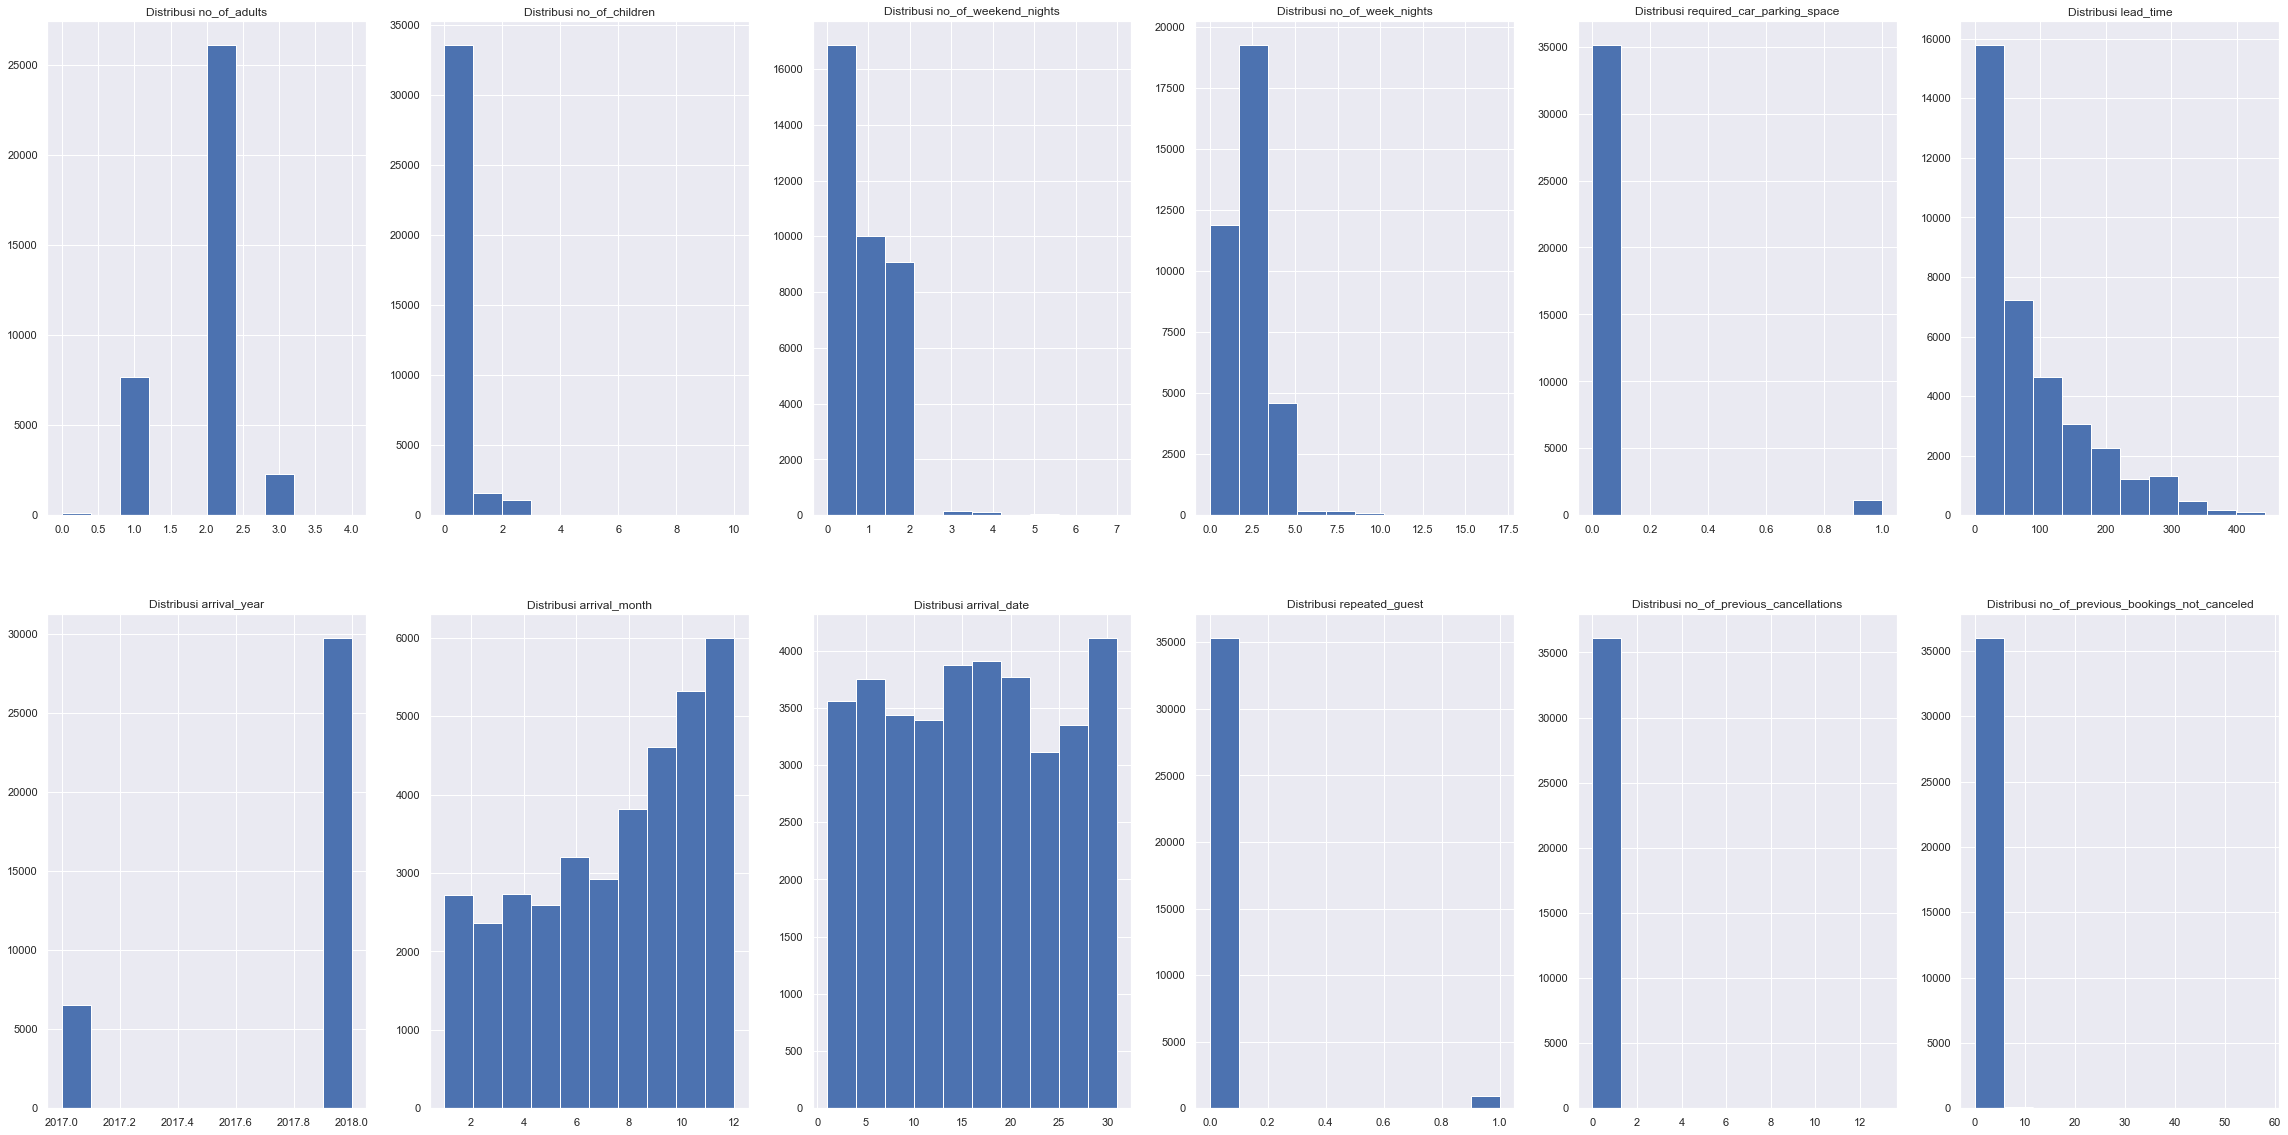

In [8]:
# Melihat distribusi setiap features.
columns_ = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
           'no_of_week_nights', 'required_car_parking_space', 'lead_time',
           'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
           'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
            'no_of_special_requests']
index_ = 0
fig, ax = plt.subplots(2,6, figsize = (40,20)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(6):
        ax[row,col].hist(data[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

**EDA**

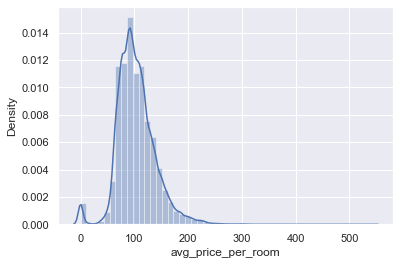

In [9]:
sns.distplot(data.avg_price_per_room)
plt.show()

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Density'>

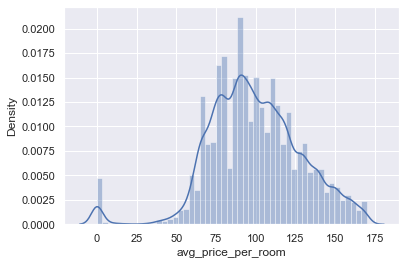

In [10]:
# I just removing by 0.5% or 1% of the problematic samples
q = data.avg_price_per_room.quantile(0.96)
data = data[data.avg_price_per_room<q]
sns.distplot(data.avg_price_per_room)

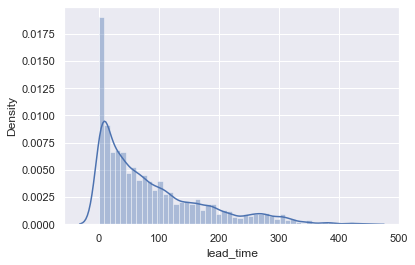

In [11]:
sns.distplot(data.lead_time)
plt.show()

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

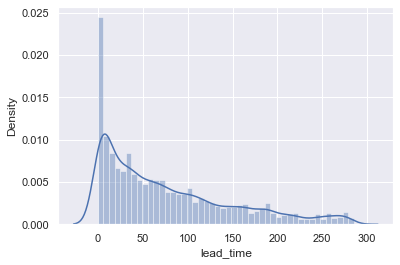

In [12]:
q = data.lead_time.quantile(0.96)
data = data[data.lead_time<q]
sns.distplot(data.lead_time)

In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,33425.0,1.831144,0.519457,0.0,2.0,2.00,2.0,4.00
no_of_children,33425.0,0.073179,0.321882,0.0,0.0,0.00,0.0,10.00
no_of_weekend_nights,33425.0,0.819147,0.873862,0.0,0.0,1.00,2.0,7.00
no_of_week_nights,33425.0,2.202423,1.419286,0.0,1.0,2.00,3.0,17.00
required_car_parking_space,33425.0,0.030187,0.171104,0.0,0.0,0.00,0.0,1.00
lead_time,33425.0,76.734331,72.379345,0.0,16.0,56.00,117.0,285.00
arrival_year,33425.0,2017.810232,0.392123,2017.0,2018.0,2018.00,2018.0,2018.00
arrival_month,33425.0,7.337143,3.110507,1.0,5.0,8.00,10.0,12.00
arrival_date,33425.0,15.524458,8.765034,1.0,8.0,15.00,23.0,31.00
repeated_guest,33425.0,0.027584,0.163781,0.0,0.0,0.00,0.0,1.00


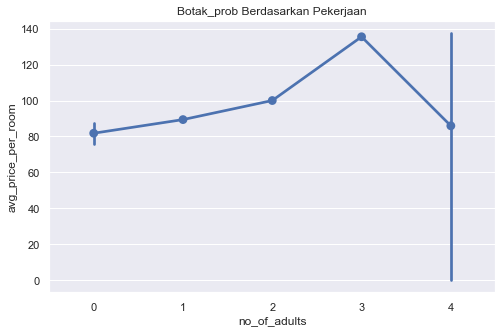

In [14]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_adults", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

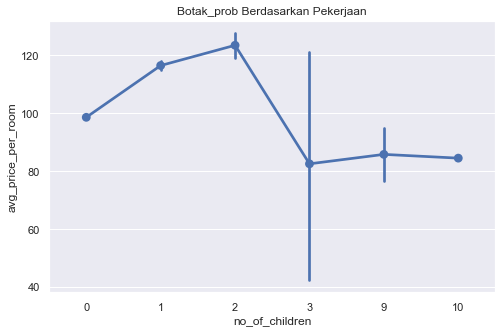

In [15]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_children", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

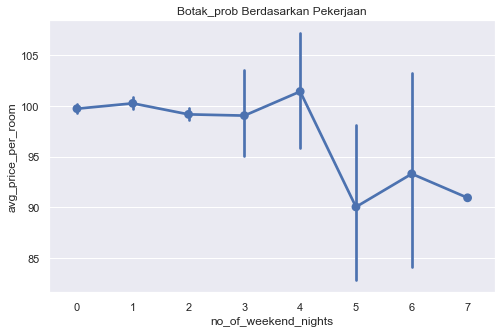

In [16]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_weekend_nights", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

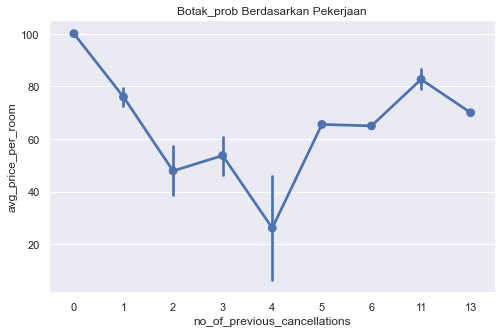

In [18]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_previous_cancellations", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

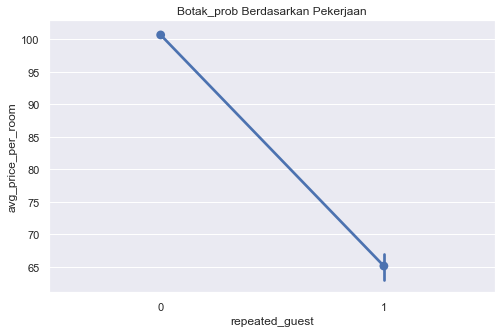

In [19]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "repeated_guest", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

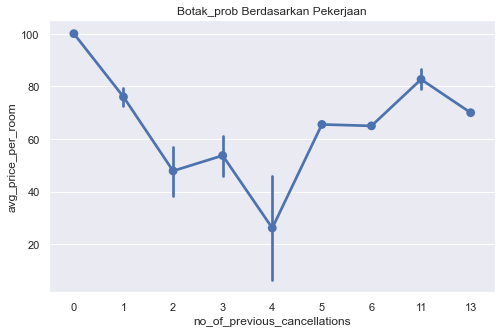

In [20]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_previous_cancellations", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

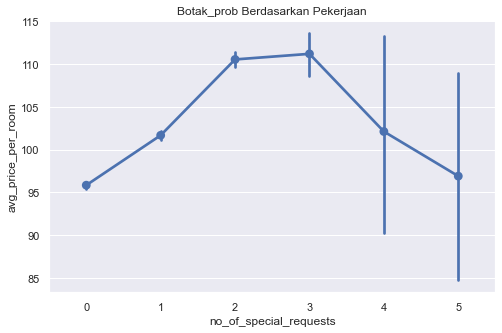

In [21]:
# Kode di bawah bertujuan untuk melihat rata-rata dari botak_prob berdasarkan kategori pekerjaan dengan menggunakan point plot.
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "avg_price_per_room", x = "no_of_special_requests", data = data, ax = ax)
ax.set_title("Botak_prob Berdasarkan Pekerjaan")
plt.show()

## Performing Statistical Test

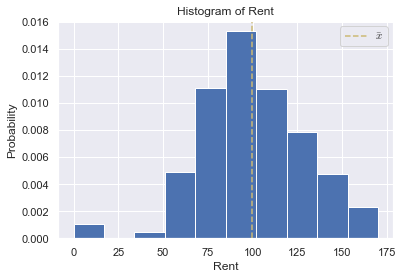

In [22]:
plt.hist(data["avg_price_per_room"], density = True)

mean_rent = np.mean(data["avg_price_per_room"])
std_rent = np.std(data["avg_price_per_room"])

plt.axvline(mean_rent, color ="y", linestyle = "--", label = r"$\bar{x}$")
plt.xlabel('Rent') 
plt.ylabel('Probability')
plt.title('Histogram of Rent')
plt.legend()
plt.show()

In [23]:
from scipy.stats import ttest_1samp

mean_price = np.mean(data["avg_price_per_room"])
std_price = np.std(data["avg_price_per_room"])

t_statistics, p_value = ttest_1samp(a = data["avg_price_per_room"], popmean=103.42, alternative='greater')
#result = ttest_ind(men, women, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f"Mean of price per room = ${np.round(mean_rent,2)}")
print(f"Standard deviation of price per room in samples = ${np.round(std_rent,2)}")
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : x <= 103.42')
print('H1 : x > 103.42')
print("alpha = 0.05")
print("="*50)

print(f"t stats : {t_statistics:.4f}")
print(f"p-value : {p_value:.4f}")
print("="*50)

print("Kesimpulan :")
# Decision rule based on p-value and alpha

if p_value<0.01:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Mean of price per room = $99.71
Standard deviation of price per room in samples = $29.57
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : x <= 103.42
H1 : x > 103.42
alpha = 0.05
t stats : -22.9553
p-value : 1.0000
Kesimpulan :
Failed to reject the Null hypothesis


Berdasarkan data tersebut, nilai p value dari data tersebut adalah 1 dimana jika kita lihat dari decision rule maka nilai tersebut lebih besar dari 0.01, sehingga hasilnya ialah gagal menolak null hypothesis.
Kita menggunakan sample berupa mean yang merujuk populasi dari rataan harga per kamar dan meskipun kita memiliki sample yang cukup besar, kita tidak tahu standar deviasi dari populasi tersebut, maka dari itu kita menggunakan t-test. T-test dapat menginformasikan seberapa jauh standar deviasi dari mean sample maupun populasi, jika dibawah asumsi maka H0 adalah benar. Setelah itu, kita juga perlu melakukan perhitungan confidence interval untuk menaksir true mean dalam populasi.
Karena kita tidak mengetahui nilai H1 maka kita menggunakan metode two-sided test.

2.3595037356523183


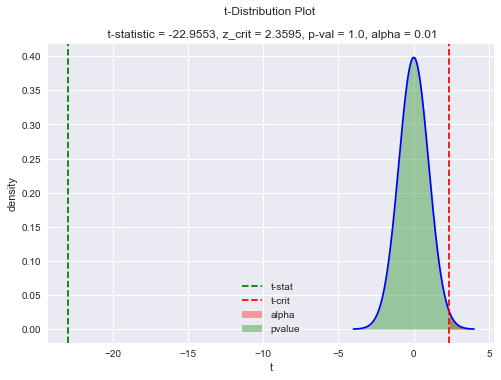

In [24]:
# critical value in our case is t-value where the right-tailed area under a standard normal distribution is 0.01 (alpha)
# set df as sample size minus 1, df is degree of freedom as parameter to compute t-value under t-distribution

import scipy.stats as stats
t_crit = stats.t.ppf(1-0.01, df = 114)
print(t_crit)

# Visualization
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot sample distribution 
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.t.pdf(x, df = 114), 
         color='blue')

# plot alpha region
x_alpha = np.arange(t_crit, 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = 114)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(t_statistics, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = 114)
plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(t_statistics, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")

plt.title(f't-Distribution Plot \n\n t-statistic = {np.round(t_statistics, 4)}, z_crit = {np.round(t_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.01');

In [25]:
data.avg_price_per_room.mean()

99.7069711293917

In [26]:
cols = data.columns
for i in cols:
    print(data[i].unique())  
    
cols

['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
[2 1 3 0 4]
[ 0  2  1  3 10  9]
[1 2 0 4 3 6 5 7]
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
[0 1]
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
[224   5   1 211  48  34  83 121  44   0  35  30  95  47 256  99  12 122
   2  37 130  60  56 107  72  23 247 186  64  96  41  55 146  32  57   7
 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74 143 177  18
 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134 118 189  16
  24   8  10 182 123 105 148  14  85  25  28  80  11 162  82  27 245 266
 112  88  69 273   4  97  31  62 197 280 185 160 104  22 109 126  81  54
  15 161 147  87 127 156  58 111 195 119  59  78 103  70  76  49  77  36
  79  21  33 164 152  43 102  71 209  93  53 239  45 167 113   9 166 174
  61 151  52  84  67 282  38 175  89 133   3  65  66  50 159 115 237 125

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

In [28]:
req = data[data["required_car_parking_space"] == 1]["avg_price_per_room"] # Membuat variabel untuk kategori laki-laki.
not_req = data[data["required_car_parking_space"] == 0]["avg_price_per_room"] # Membuat variabel untuk kategori perempuan.

n_men = req.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_women = not_req.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(req, not_req, equal_var = True, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk customer yang membutuhkan area parkir = {n_men}')
print(f'Banyak sampel untuk customer yang tidak membutuhkan area parkir = {n_women}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : required_car_parking_space <= 103.42')
print('H1 : required_car_parking_space > 103.42')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")

print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan membutuhkan area parkir. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana harga kamar pelanggan yang membutuhkan area parkir memiliki harga lebih besar daripada rata-rata.")

Banyak sampel untuk customer yang membutuhkan area parkir = 1009
Banyak sampel untuk customer yang tidak membutuhkan area parkir = 32416
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : required_car_parking_space <= 103.42
H1 : required_car_parking_space > 103.42
alpha = 0.05
Statistik Hitung = 6.919934626284837
P Value = 2.2999380113717285e-12
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan membutuhkan area parkir. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana harga kamar pelanggan yang membutuhkan area parkir memiliki harga lebih besar daripada rata-rata.


In [29]:
req = data[data["repeated_guest"] == 1]["avg_price_per_room"] # Membuat variabel untuk kategori laki-laki.
not_req = data[data["repeated_guest"] == 0]["avg_price_per_room"] # Membuat variabel untuk kategori perempuan.

n_men = req.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_women = not_req.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(req, not_req, equal_var = True, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk yang melakukan reorder = {n_men}')
print(f'Banyak sampel untuk yang tidak melakukan reorder = {n_women}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : repeated_guest <= 103.42')
print('H1 : repeated_guest > 103.42')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan tidak ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan reorder kamar.\ Oleh karena itu, diperoleh keputusan untuk gagal menolak H0 yang dimana harga kamar pelanggan yang melakukan repeat order memiliki harga lebih kecil daripada rata-rata.")

Banyak sampel untuk yang melakukan reorder = 922
Banyak sampel untuk yang tidak melakukan reorder = 32503
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : repeated_guest <= 103.42
H1 : repeated_guest > 103.42
alpha = 0.05
Statistik Hitung = -36.723792545447374
P Value = 1.0
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan tidak ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan reorder kamar.\ Oleh karena itu, diperoleh keputusan untuk gagal menolak H0 yang dimana harga kamar pelanggan yang melakukan repeat order memiliki harga lebih kecil daripada rata-rata.


In [30]:
req = data[data["booking_status"] == 'Canceled']["avg_price_per_room"] # Membuat variabel untuk kategori laki-laki.
not_req = data[data["booking_status"] == 'Not_Canceled']["avg_price_per_room"] # Membuat variabel untuk kategori perempuan.

n_men = req.shape[0] # Menghitung jumlah observasi pada kategori laki-laki.
n_women = not_req.shape[0] # Menghitung jumlah obsercasi pada kategori perempuan.
result = ttest_ind(req, not_req, equal_var = True, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk yang melakukan booking = {n_men}')
print(f'Banyak sampel untuk yang tidak melakukan booking = {n_women}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_laki-laki - mu_perempuan <= 0')
print('H1 : mu_laki-laki - mu_perempuan > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

print("Kesimpulan :")
print("Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan pemesanan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana harga kamar pelanggan yang melakukan pemesanan memiliki harga lebih besar daripada rata-rata.")

Banyak sampel untuk yang melakukan booking = 10248
Banyak sampel untuk yang tidak melakukan booking = 23177
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_laki-laki - mu_perempuan <= 0
H1 : mu_laki-laki - mu_perempuan > 0
alpha = 0.05
Statistik Hitung = 31.109068498389476
P Value = 8.897660353376047e-210
Kesimpulan :
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan pemesanan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana harga kamar pelanggan yang melakukan pemesanan memiliki harga lebih besar daripada rata-rata.


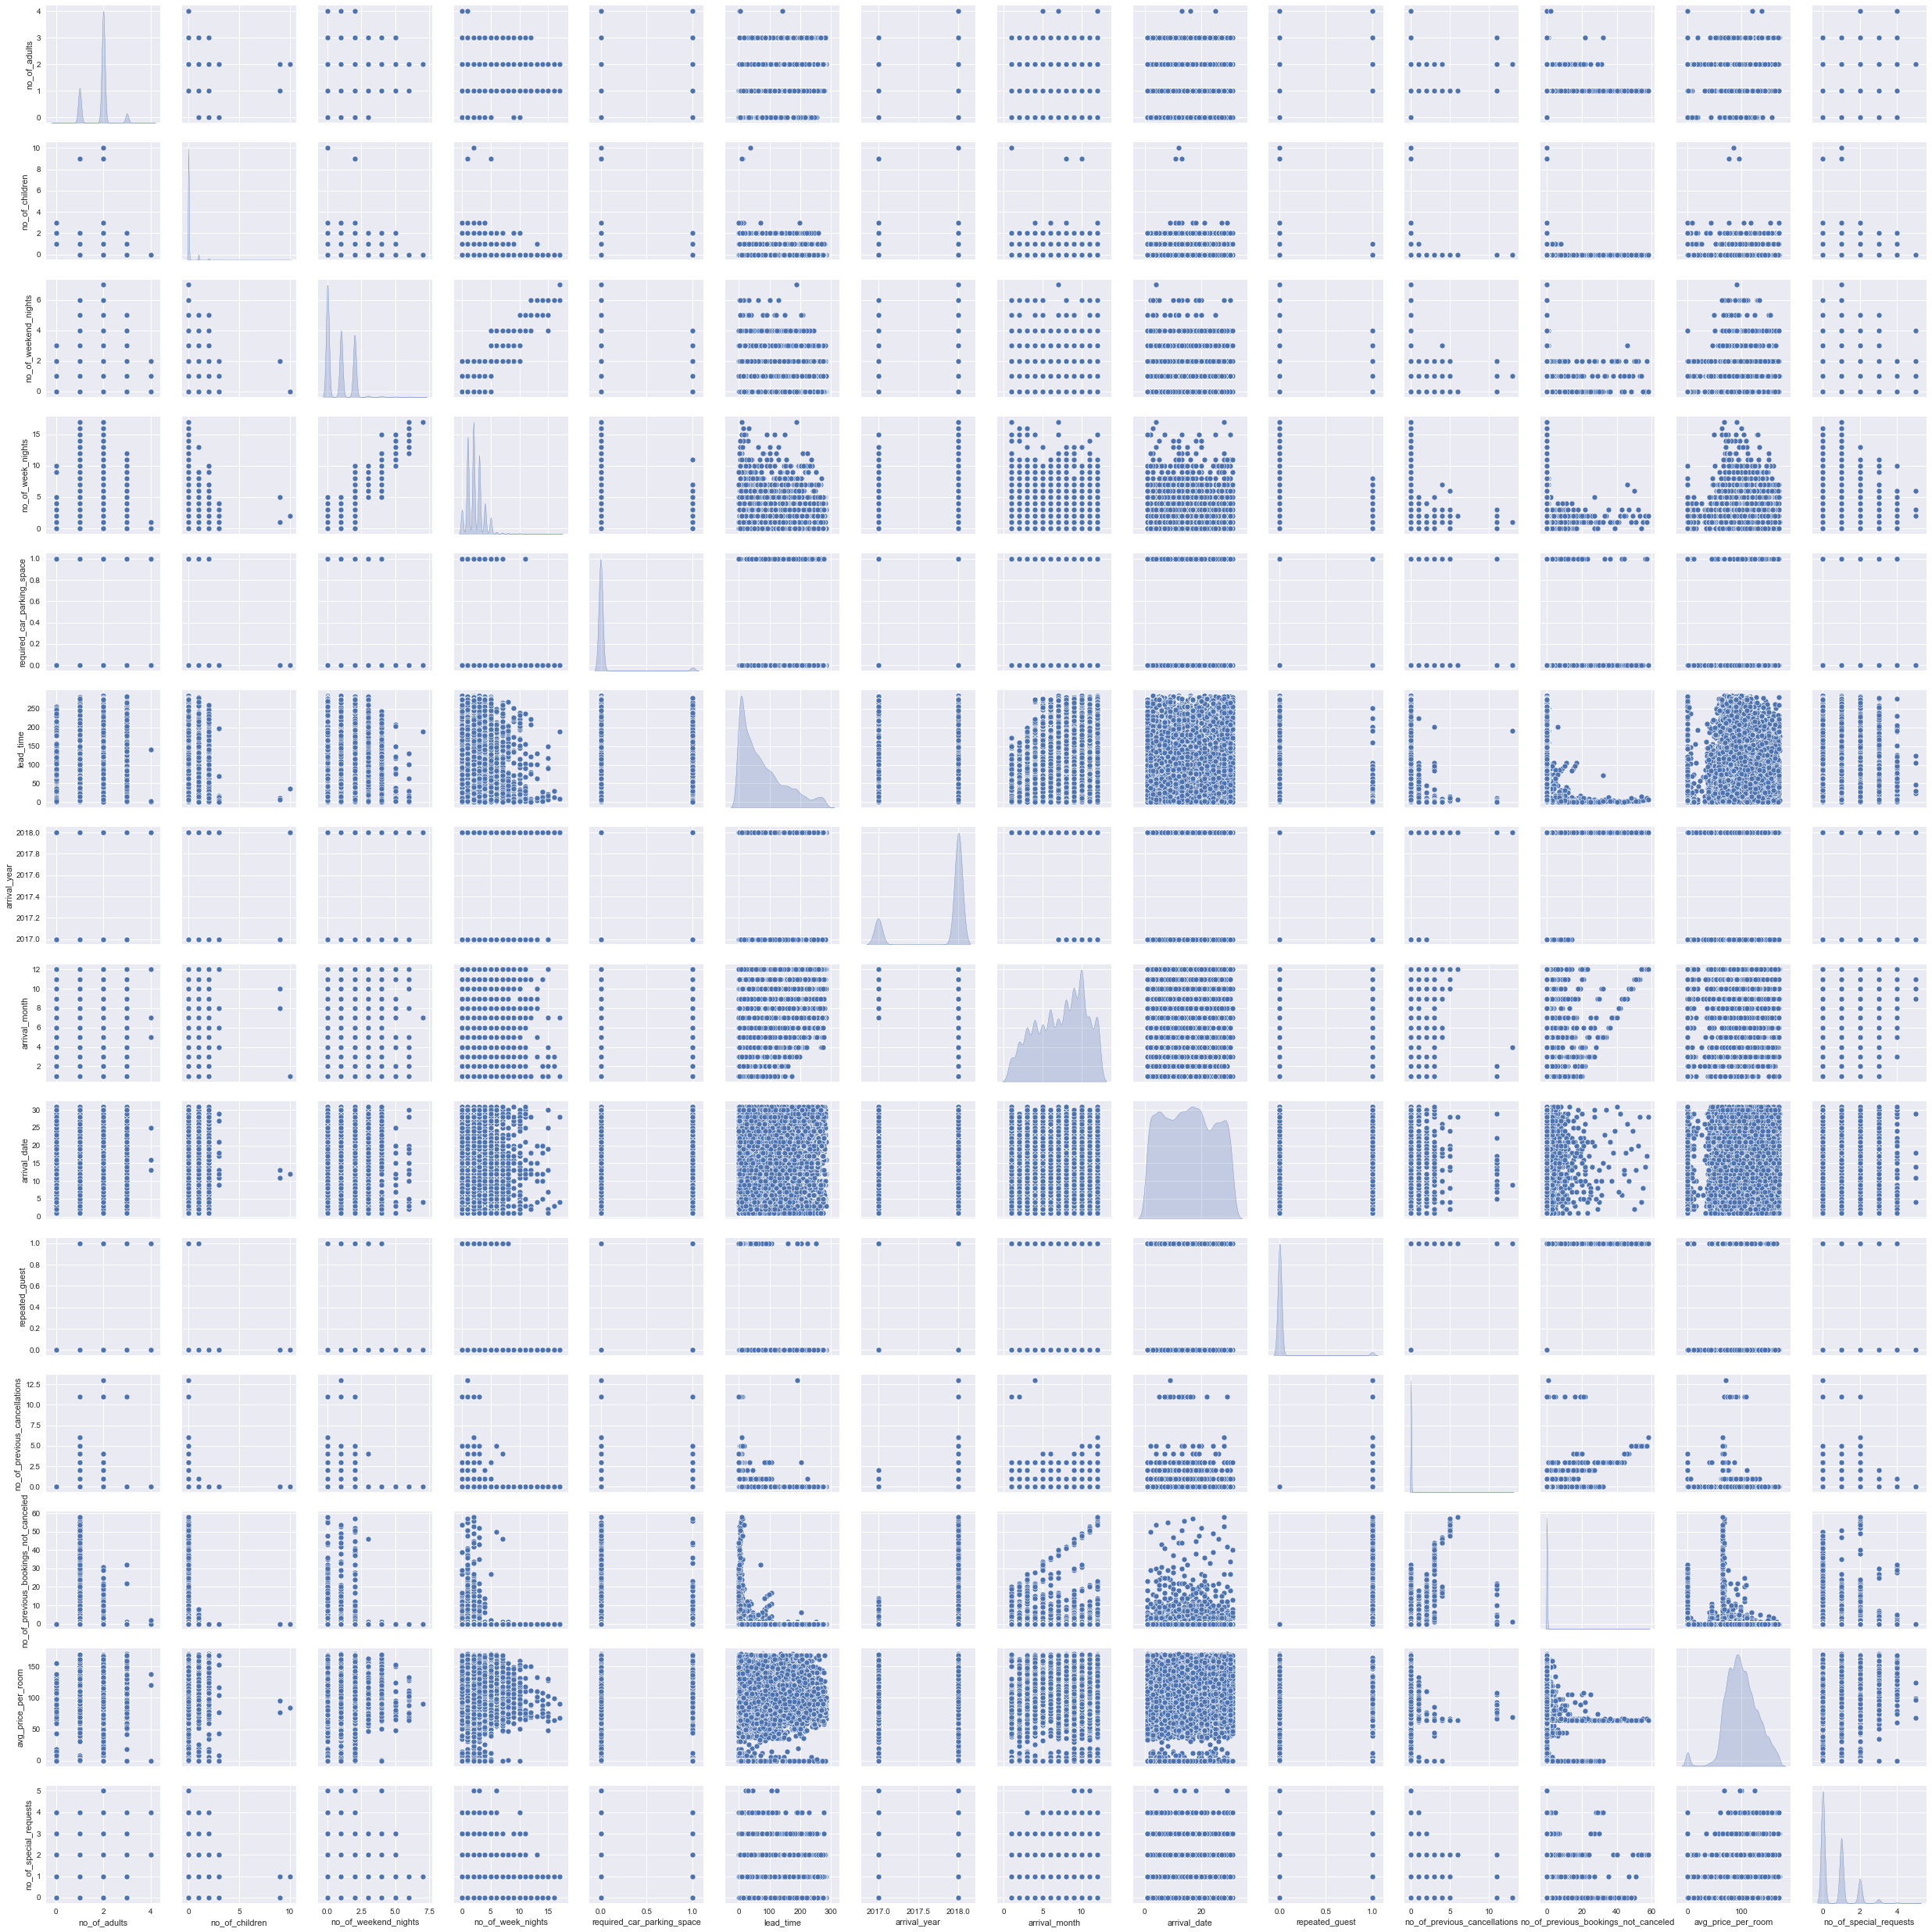

In [31]:
# Kode di bawah bertujuan untuk memvisualisasikan interaksi antara bebera features dengan meggunakan scatter plot dan kde plot.
sns.pairplot(data[cols], diag_kind = 'kde')
plt.show()

In [32]:
cols

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [33]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis sampo
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : Meal Plan 1 = Not Selected = Meal Plan 2 = Meal Plan 3")
print("H1 : Setidaknya terdapat satu yang berbeda")
print("Alpha = 0.05")

model_sampo = ols('avg_price_per_room ~ type_of_meal_plan', data = data).fit() # Membuat persamaan linear antara botak_prob dengan variabel sampo.
aov_table_1 = sm.stats.anova_lm(model_sampo) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value  < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori tipe makanan yang dipesan" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : Meal Plan 1 = Not Selected = Meal Plan 2 = Meal Plan 3
H1 : Setidaknya terdapat satu yang berbeda
Alpha = 0.05
Hasil dari Uji ANOVA :
                        df        sum_sq       mean_sq           F  \
type_of_meal_plan      3.0  2.886475e+05  96215.817855  111.110397   
Residual           33421.0  2.894085e+07    865.947928         NaN   

                         PR(>F)  
type_of_meal_plan  1.377708e-71  
Residual                    NaN  
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value  < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori tipe makanan yang dipesan


In [34]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis sampo
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : Room_Type 1 = Room_Type 4 = Room_Type 2 = Room_Type 6 = Room_Type 5 = Room_Type 7 = Room_Type 3")
print("H1 : Setidaknya terdapat satu yang berbeda")
print("Alpha = 0.05")

model_sampo = ols('avg_price_per_room ~ room_type_reserved', data = data).fit() # Membuat persamaan linear antara botak_prob dengan variabel sampo.
aov_table_1 = sm.stats.anova_lm(model_sampo) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori jenis kamar" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : Room_Type 1 = Room_Type 4 = Room_Type 2 = Room_Type 6 = Room_Type 5 = Room_Type 7 = Room_Type 3
H1 : Setidaknya terdapat satu yang berbeda
Alpha = 0.05
Hasil dari Uji ANOVA :
                         df        sum_sq        mean_sq           F  PR(>F)
room_type_reserved      6.0  4.269021e+06  711503.553745  952.587191     0.0
Residual            33418.0  2.496047e+07     746.916986         NaN     NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori jenis kamar


In [35]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis sampo
print("Pertama, menyatakan hipotesis dan taraf signifikansi :")
print("H0 : Offline = Online = Corporate = Aviation = Complementary")
print("H1 : Setidaknya terdapat satu yang berbeda")
print("Alpha = 0.05")

model_sampo = ols('avg_price_per_room ~ market_segment_type', data = data).fit() # Membuat persamaan linear antara botak_prob dengan variabel sampo.
aov_table_1 = sm.stats.anova_lm(model_sampo) # Melakuakn uji ANOVA.

print("="*50)

print("Hasil dari Uji ANOVA :")
print(aov_table_1)
print("="*50)

print("Kesimpulan :")
print("Karena hasil uji ANOVA menyatakan p-value  < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori pasar yang diincar" )

Pertama, menyatakan hipotesis dan taraf signifikansi :
H0 : Offline = Online = Corporate = Aviation = Complementary
H1 : Setidaknya terdapat satu yang berbeda
Alpha = 0.05
Hasil dari Uji ANOVA :
                          df        sum_sq       mean_sq            F  PR(>F)
market_segment_type      4.0  6.363067e+06  1.590767e+06  2324.955634     0.0
Residual             33420.0  2.286643e+07  6.842138e+02          NaN     NaN
Kesimpulan :
Karena hasil uji ANOVA menyatakan p-value  < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana setidaknya ada perbedaan rata - rata probabilitas harga sebuah kamar yang signifkan dengan perbedaan kategori pasar yang diincar


In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

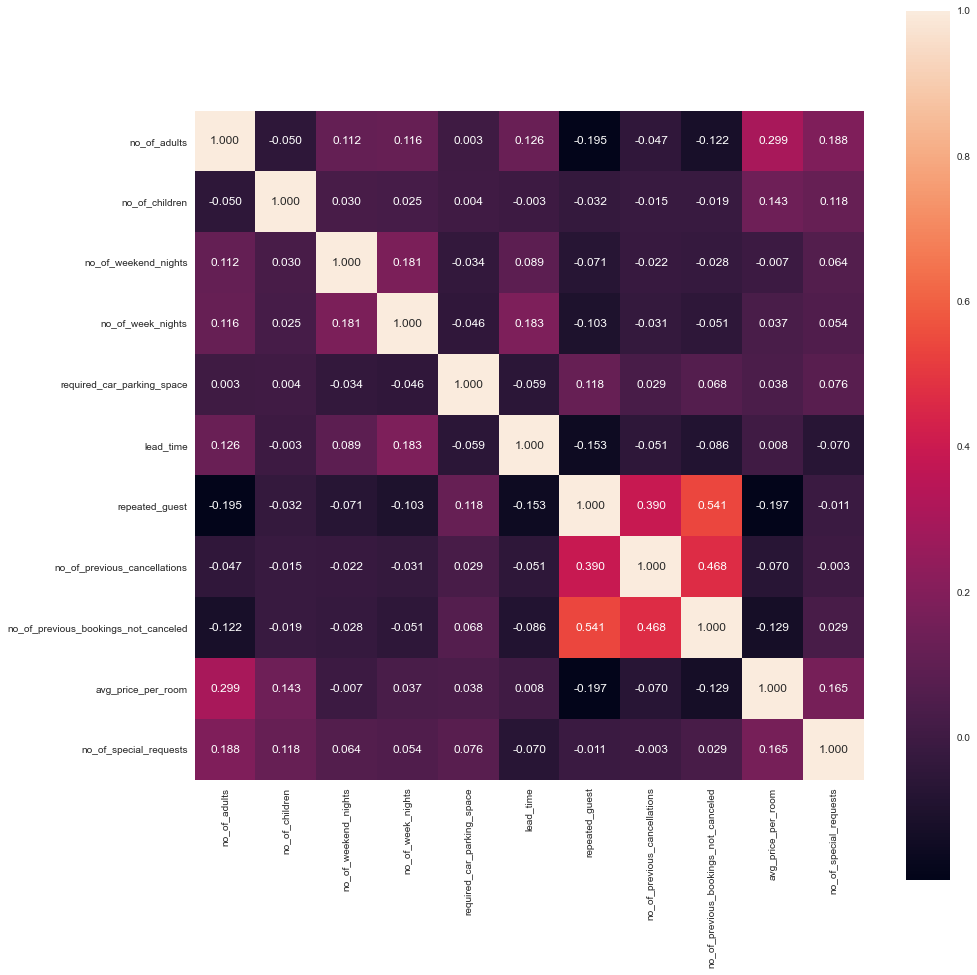

In [37]:
# Kode di bawah untuk melihat korelasi antar features.
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
corr_ = data[cols].corr()
plt.figure(figsize = (15,16))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

Berdasarkan kedua plot di atas, terlihat bahwa variabel repeated guest, jumlah pelanggan yang melakukan pembatalan, jumlah akhir pekan dan jumlah pelanggan yang tidak melakukan pembatalan tidak memiliki asosiasi yang kuat dengan probabilitas rataan sebuah harga kamar.

## **Building Regression Model**
Berdasarkan hasil pengujian statistik sebelumnya, kita mengetahui bahwa terdapat beberapa variabel yang signifikan memengaruhi rataan harga sebuah kamar. Variabel-variabel inilah yang akan kita utamakan dalam membangun model regresi. Untuk variabel-variabel yang tidak signifikan tidak akan dilibatkan.

In [38]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [39]:
data.drop(['repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_weekend_nights'], axis=1, inplace = True)

In [40]:
data.drop(['Booking_ID'], axis=1, inplace = True)

In [41]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_week_nights',
       'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'avg_price_per_room', 'no_of_special_requests',
       'booking_status'],
      dtype='object')

In [49]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

# Import the library (use .formula so we can write the formula we want in the model)
import statsmodels.formula.api as smf

# Create OLS model object
model = smf.ols('avg_price_per_room ~ no_of_adults', data)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_heights = print_coef_std_err(results)

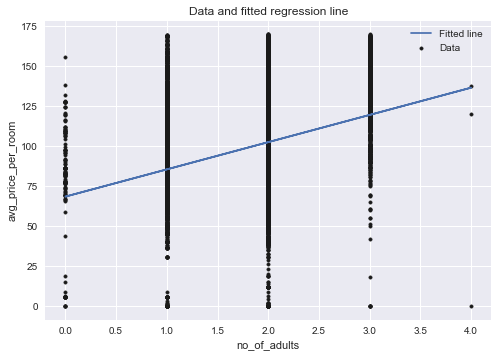

In [50]:
predictor = "no_of_adults"
outcome = "avg_price_per_room"
data = data.copy()
results_ = results_heights.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], marker=".", label="Data", color = "k")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

fitted_values = a_hat + b_hat * data[predictor]

# Plot the fitted line
plt.plot(data[predictor], fitted_values, label="Fitted line")

# Add a legend and labels
plt.legend()
plt.xlabel(f"{predictor}")
plt.ylabel(f"{outcome}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [42]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('avg_price_per_room ~ no_of_adults + no_of_children + no_of_week_nights + type_of_meal_plan + required_car_parking_space + room_type_reserved + lead_time + market_segment_type + no_of_special_requests + booking_status', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     avg_price_per_room   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:54:13   Log-Likelihood:            -1.5214e+05
No. Observations:               33425   AIC:                         3.043e+05
Df Residuals:                   33404   BIC:                         3.045e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [43]:
#Alternative way using one hot encoding
encoded_df = pd.get_dummies(data = data, columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
encoded_df

,no_of_adults,no_of_children,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,2,0,2,0,224,2017,10,2,65.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2,0,3,0,5,2018,11,6,106.68,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,1,0,1,0,1,2018,2,28,60.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,2,0,2,0,211,2018,5,20,100.00,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,2,0,1,0,48,2018,4,11,94.50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,6,0,85,2018,8,3,167.80,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
36271,2,0,3,0,228,2018,10,17,90.95,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
36272,2,0,6,0,148,2018,7,1,98.39,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
36273,2,0,3,0,63,2018,4,21,94.50,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [44]:
encoded_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Canceled',
       'booking_status_Not_Canceled'],
      dtype='object')

In [45]:
encoded_df.rename(columns={'type_of_meal_plan_Meal Plan 1': 'type_of_meal_plan_Meal_Plan_1',
                           'type_of_meal_plan_Meal Plan 2': 'type_of_meal_plan_Meal_Plan_2',
                           'type_of_meal_plan_Meal Plan 3': 'type_of_meal_plan_Meal_Plan_3',
                           'type_of_meal_plan_Not Selected': 'type_of_meal_plan_Not_Selected',
                           'room_type_reserved_Room_Type 1': 'room_type_reserved_Room_Type_1',
                           'room_type_reserved_Room_Type 2': 'room_type_reserved_Room_Type_2',
                           'room_type_reserved_Room_Type 3': 'room_type_reserved_Room_Type_3',
                           'room_type_reserved_Room_Type 4': 'room_type_reserved_Room_Type_4',
                           'room_type_reserved_Room_Type 5': 'room_type_reserved_Room_Type_5',
                           'room_type_reserved_Room_Type 6': 'room_type_reserved_Room_Type_6',
                           'room_type_reserved_Room_Type 7': 'room_type_reserved_Room_Type_7'}, inplace=True)

In [46]:
encoded_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_week_nights',
       'required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal_Plan_1',
       'type_of_meal_plan_Meal_Plan_2', 'type_of_meal_plan_Meal_Plan_3',
       'type_of_meal_plan_Not_Selected', 'room_type_reserved_Room_Type_1',
       'room_type_reserved_Room_Type_2', 'room_type_reserved_Room_Type_3',
       'room_type_reserved_Room_Type_4', 'room_type_reserved_Room_Type_5',
       'room_type_reserved_Room_Type_6', 'room_type_reserved_Room_Type_7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Canceled',
       'booking_status_Not_Canceled'],
      dtype='object')

In [47]:
#Construct the model
lm = smf.ols('avg_price_per_room ~ no_of_adults + no_of_children + no_of_week_nights + required_car_parking_space + lead_time + no_of_special_requests+ type_of_meal_plan_Meal_Plan_1 + type_of_meal_plan_Meal_Plan_2 + type_of_meal_plan_Meal_Plan_3 + type_of_meal_plan_Not_Selected + room_type_reserved_Room_Type_1 +  room_type_reserved_Room_Type_2 + room_type_reserved_Room_Type_3 + room_type_reserved_Room_Type_4 + room_type_reserved_Room_Type_5 + room_type_reserved_Room_Type_6 + room_type_reserved_Room_Type_7 +  market_segment_type_Aviation + market_segment_type_Complementary +  market_segment_type_Corporate + market_segment_type_Online + market_segment_type_Offline + no_of_special_requests + booking_status_Canceled + booking_status_Not_Canceled', data = encoded_df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     avg_price_per_room   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        07:54:13   Log-Likelihood:            -1.5214e+05
No. Observations:               33425   AIC:                         3.043e+05
Df Residuals:                   33404   BIC:                         3.045e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## **Kesimpulan dan rekomendasi**

Setelah dilakukan analisa statistik, insight yang dapat diambil antara lain
Mean of price per room adalah 99.71 dan Standard deviation of price per room in samples adalah 29.57

- Variable yang mempengaruhi rataan harga sebuah kamar hotel yang ada di hotel tersebut berdasarkan eksplorasi antara lain jumlah pelanggan dewasa, jumlah pelanggan anak-anak, apakah pelanggan membutuhkan tempat parkir, jumlah tamu istimewa, jenis kamar yang dipesan, dan segmen pasar yang diincar.

1. no_of_adults, jumlah pelanggan dewasa mempengaruhi harga sebuah kamar, dimana semakin banyak pelanggan akan semakin mahal rataan harga sebuah kamar
2. no_of_children, jumlah pelanggan anak-anak mempengaruhi harga sebuah kamar, dimana semakin banyak pelanggan akan semakin mahal rataan harga sebuah kamar
3. no_of_special_requests, jika calon pelanggan adalah seorang yang memiliki jabatan atau orang yang berpengaruh terhadap keberlangsungan dunia, maka akan mendapat harga khusus
4. room_type_reserved_Room_Type, Jenis kamar yang dipesan akan mempengaruhi rataan harga sebuah kamar, semakin luxury kamar tersebut akan semakin tinggi rataan harga sebuah kamar
5. market_segment_type, tipe pasar yang diincar oleh management hotel tentu memiliki kategori yang berbeda-beda, implikasinya akan bepengaruh pada rataan sebuah kamar

- Apakah variabel required_car_parking_space mempunyai hubungan yang kuat dengan probabilitas kenaikan rataan harga sebuah kamar?
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan membutuhkan area parkir.

- Apakah variabel repeated_order mempunyai hubungan yang kuat dengan probabilitas kenaikan rataan harga sebuah kamar?
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh > 0.05 yang berartikan tidak ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan reorder kamar.

- Apakah variabel booking_status mempunyai hubungan yang kuat dengan probabilitas kenaikan rataan harga sebuah kamar?
Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan ada perbedaan rata-rata probabilitas secara signifikan terhadap harga per kamar jika pelanggan melakukan pemesanan

Bagaimana kesimpulan akhirnya ? dan rekomendasi apakah yang dapat dilakukan?

Terdapat beberapa faktor yang menjadi perhatian, yaitu jumlah pelanggan dewasa, jumlah pelanggan anak-anak, apakah pelanggan membutuhkan tempat parkir, jumlah tamu istimewa, jenis kamar yang dipesan, dan segmen pasar yang diincar. Faktor tersebut dapat mempengaruhi tingkat kecenderungan rataan harga sebuah kamar. Faktor-faktor yang dapat dilakukan upaya dalam meningkatkan harga rataan sebuah kamar, yaitu :

1. Faktor pelanggan prioritas, jadi melakukan service yang berlebih kepada tamutamu special, agar mereka melakukan repeat booking, sehingga dapat meningkatkan revenue hotel karena mereka mereka memiliki rataan harga yang tergolong tinggi per kamarnya

2. Faktor pelanggan yang melakukan pemesanan terhadap golongan kamar tertentu, kembali ke permasalahan penggolongan pelanggan, harus dilakukan perlakuan khusus. agar mereka melakukan repeat booking, sehingga dapat meningkatkan revenue hotel karena semakin luxury kamar yang mereka pesan maka mereka rataan harga akan naik juga.


